In [1]:
#Importing the libraries and MovieLens 100K Dataset
import numpy as np
import pandas as pd

In [2]:
#u.info has the number of users, items and rating in the u.data set

data_info = pd.read_csv('ml-100k/u.info',header=None)
print("Details",list(data_info[0]))

Details ['943 users', '1682 items', '100000 ratings']


In [3]:
#u.data is the full u dataset, 100k ratings by 973 users on 1687 items
column= ['user id','movie id','rating','timestamp']
ratings= pd.read_csv('ml-100k/u.data',sep='\t',names=column)
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [5]:
#u.item has information about the items(movies) the movie can be in several genres where 1 indicates the movie is of that genre, 0 indicates it is not.

column1="movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western"
column1=column1.split(' | ')
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column1,encoding='latin-1')
items_dataset.head()


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
movie_dataset.isnull().sum()

movie id       0
movie title    0
dtype: int64

In [8]:
#merging the u.data which is our rating dataframe and movie_dataset which is the subset of u.items

merged_dataset = pd.merge(ratings, movie_dataset, how='inner', on='movie id')
merged_dataset.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [9]:
merged_dataset.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [10]:
refined_dataset=merged_dataset.groupby(by=['user id','movie title'])['rating'].mean().sort_values(ascending=False).reset_index()
refined_dataset.head()

,user id,movie title,rating
0,447,Independence Day (ID4) (1996),5.0
1,303,Breaking the Waves (1996),5.0
2,303,Bound (1996),5.0
3,776,Rob Roy (1995),5.0
4,303,Boogie Nights (1997),5.0


In [11]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


Text(0, 0.5, 'number of ratings')

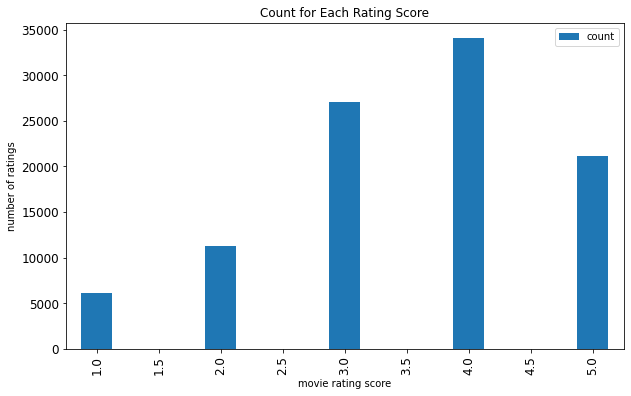

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
                                                                                  figsize=(10, 6),
                                                                                  title='Count for Each Rating Score',
                                                                                  fontsize=12)
ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

### item-based collaborative filtering

In [13]:
user_to_movie = refined_dataset.pivot(index='movie title',columns='user id',values='rating').fillna(0)
user_to_movie.head()

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# transform matrix to scipy sparse matrix
from scipy.sparse import csr_matrix
user_to_movie_df = csr_matrix(user_to_movie.values)
user_to_movie_df

<1664x943 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

In [15]:
# Creating a kNN model to print 5 recommendations similar to each movie
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_model.fit(user_to_movie_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [16]:
movies_list = list(user_to_movie.index)
movies_list[:10]

["'Til There Was You (1997)",
 '1-900 (1994)',
 '101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '187 (1997)',
 '2 Days in the Valley (1996)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 '39 Steps, The (1935)']

In [17]:
movie_dict = {movie : index for index, movie in enumerate(movies_list)}
print(movie_dict)

{"'Til There Was You (1997)": 0, '1-900 (1994)': 1, '101 Dalmatians (1996)': 2, '12 Angry Men (1957)': 3, '187 (1997)': 4, '2 Days in the Valley (1996)': 5, '20,000 Leagues Under the Sea (1954)': 6, '2001: A Space Odyssey (1968)': 7, '3 Ninjas: High Noon At Mega Mountain (1998)': 8, '39 Steps, The (1935)': 9, '8 1/2 (1963)': 10, '8 Heads in a Duffel Bag (1997)': 11, '8 Seconds (1994)': 12, 'A Chef in Love (1996)': 13, 'Above the Rim (1994)': 14, 'Absolute Power (1997)': 15, 'Abyss, The (1989)': 16, 'Ace Ventura: Pet Detective (1994)': 17, 'Ace Ventura: When Nature Calls (1995)': 18, 'Across the Sea of Time (1995)': 19, 'Addams Family Values (1993)': 20, 'Addicted to Love (1997)': 21, 'Addiction, The (1995)': 22, 'Adventures of Pinocchio, The (1996)': 23, 'Adventures of Priscilla, Queen of the Desert, The (1994)': 24, 'Adventures of Robin Hood, The (1938)': 25, 'Affair to Remember, An (1957)': 26, 'African Queen, The (1951)': 27, 'Afterglow (1997)': 28, 'Age of Innocence, The (1993)': 2

In [18]:
def get_similar_movies(movie, n = 10):
  ## input to this function is the movie and number of top similar movies you want.
  index = movie_dict[movie]
  knn_input = np.asarray([user_to_movie.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"movies which are very much similar to the Movie-",movie, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
     print(movies_list[indices[0][i]])
  

In [19]:
movie_name = '101 Dalmatians (1996)'
get_similar_movies(movie_name,15)

Top 15 movies which are very much similar to the Movie- 101 Dalmatians (1996) are: 
 
Jack (1996)
Twister (1996)
Willy Wonka and the Chocolate Factory (1971)
Independence Day (ID4) (1996)
Toy Story (1995)
Father of the Bride Part II (1995)
Hunchback of Notre Dame, The (1996)
Lion King, The (1994)
Mrs. Doubtfire (1993)
Jungle Book, The (1994)
Grumpier Old Men (1995)
Mission: Impossible (1996)
Mr. Holland's Opus (1995)
Homeward Bound II: Lost in San Francisco (1996)
Dragonheart (1996)
